# Extended Practice: Classification and Dimensionality Reduction

<img src="http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png" width="800px"/>


We'll use the same data as in the Final Practice notebook: cancer cell line sequencing data from the CCLE. We have associated metadata for the samples that detail information about each patient's tumor from which each cell line was derived.

First, read in the data. We'll want to keep the metadata and the sequencing datasets separate for these applications.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
### Using pandas, read in the file "cancer_cell_line_rnaseq.csv." This file has an index_row = 0 and header = 0.

df = #

#Solution

df = pd.read_csv("cancer_cell_line_rnaseq.csv", header= 0, index_col = 0)
### Look at the first five rows of the dataframe. What do you notice about the data type for each column?

In [3]:
### Using pandas, read in the file "cell_line_metadata.csv." This file has an index_row = 0 and header = 0.
meta = #

#Solution
meta = pd.read_csv("cell_line_metadata.csv", header= 0, index_col = 0)

### Look at the first five rows of the dataframe. What do you notice about the data type for each column? 


In [19]:
meta

,Pathology,Site_Primary,Gender,Age,mutRate
CCLE_ID,,,,,
MDAMB175VII_BREAST,metastasis,breast,female,56.0,157.887302
HS739T_FIBROBLAST,primary,breast,female,52.0,147.006717
HS742T_FIBROBLAST,primary,breast,female,71.0,100.726961
HCC2157_BREAST,primary,breast,female,48.0,173.186543
KPL1_BREAST,metastasis,breast,female,50.0,117.755152
...,...,...,...,...,...
SH4_SKIN,metastasis,skin,female,60.0,109.541023
COLO800_SKIN,primary,skin,male,14.0,99.235790
CJM_SKIN,metastasis,skin,NaN,NaN,148.442355


In [ ]:
### Are there any missing values in either dataset?

## Section 1: Dimensionality Reduction

Dimensionality reduction is a great way to visualize high dimensional data. This is a very important first step to data analysis when you can't visualize your data easily in two dimensions, because it will give you an idea of it there are any patterns in the dataset. 

![image.png](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7650282/bin/13059_2020_2133_Fig1_HTML.jpg)

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7650282/

Probably the most common form of dimensionality reduction is **Principal Components Analysis**, or PCA. There is a great visual exploration of PCA [here](https://setosa.io/ev/principal-component-analysis/) if you are unfamiliar with the technique. Essentially, we want to find the axis of highest variance in our dataset, and then rotate our data so that this axis becomes our x-axis in a plot. The axis with the next highest variance (which must be _orthogonal_ to the first axis) becomes our y-axis, the third becomes a z-axis, etc. You can also utilize tons of information about the PCA model itself without plotting; for example, this analysis will tell us which of our features are contributing the most the variance in each component. So using PCA we can get an idea of which features might be most important for distinguishing samples and understanding patterns in the data.

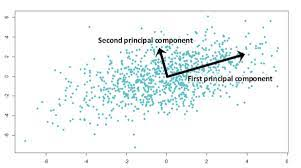

To execute a PCA, we'll once again use sklearn, and build a PCA model in a very similar way that we built the Linear Regression model earlier.

In [4]:
from sklearn.decomposition import PCA

### Step 1: Define the input data

In [8]:
## Convert the sequencing dataset to a numpy array (samples x features)
data = np.array(df.T)

### Step 2: Create a model

Here we will define that we want a 2-dimensional PCA-- i.e. the top 2 components. We could also leave this blank, and the PCA will keep all the components.

In [10]:
pca = PCA(n_components=2)

### Step 3: Fit the model

Here we will fit the model to our data. This step is often combined with Step 2 in a single line of code.

In [11]:
pca.fit(data)

PCA(n_components=2)

### Step 4: Transform our data to the principal components

In [12]:
X_pca = pca.transform(data)

### Step 5: Visualize top components

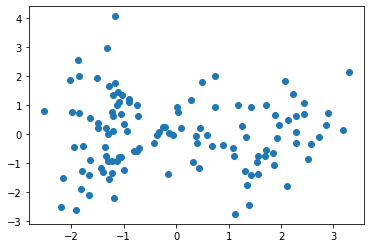

In [15]:
plt.scatter(X_pca[:,0],X_pca[:,1])

To use seaborn, let's make a nice dataframe combining this PCA data with the metadata.

In [16]:
# we'll make a df with index = samples, so we'll pull the columns from the original df
data_df = pd.DataFrame(X_pca, columns = ['PC1','PC2'], index = df.columns)

Now let's merge the PCA dataframe with the metadata.

In [23]:
full_df = data_df.merge(meta, left_index = True, right_index = True)

In [26]:
full_df

,PC1,PC2,Pathology,Site_Primary,Gender,Age,mutRate
MDAMB175VII_BREAST,0.736324,2.008313,metastasis,breast,female,56.0,157.887302
HS739T_FIBROBLAST,2.511670,-0.859251,primary,breast,female,52.0,147.006717
HS742T_FIBROBLAST,1.696399,-0.775982,primary,breast,female,71.0,100.726961
HCC2157_BREAST,-1.200891,1.341216,primary,breast,female,48.0,173.186543
KPL1_BREAST,-1.207286,0.630106,metastasis,breast,female,50.0,117.755152
...,...,...,...,...,...,...,...
SH4_SKIN,-1.341384,-0.765775,metastasis,skin,female,60.0,109.541023
COLO800_SKIN,-1.221766,-0.952404,primary,skin,male,14.0,99.235790
CJM_SKIN,-0.326264,0.052992,metastasis,skin,NaN,NaN,148.442355
HS940T_FIBROBLAST,1.928848,-0.126848,primary,skin,male,57.0,81.501411


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

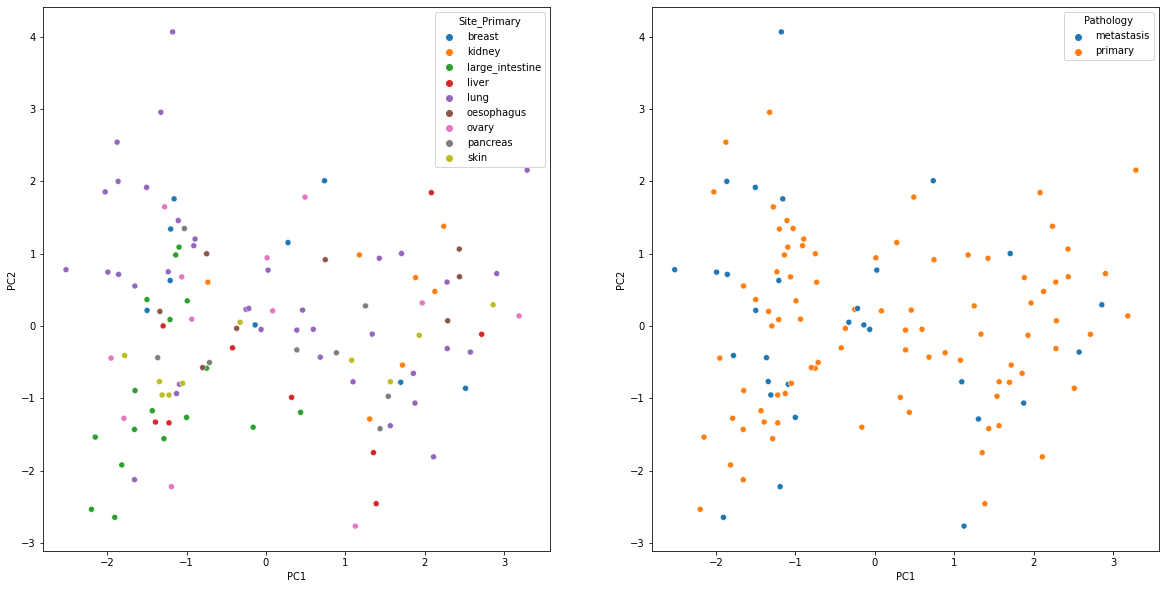

In [33]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data = full_df, x = 'PC1', y = 'PC2', hue = 'Site_Primary')

plt.subplot(1,2,2)
sns.scatterplot(data = full_df, x = 'PC1', y = 'PC2', hue = 'Pathology')

### Practice 1: Large intestine vs lung tumors
Subset the dataframe to include only large intestine and lung tumors, and plot the first two principal components.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

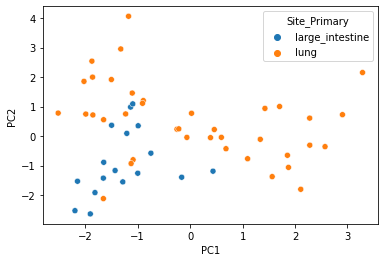

In [36]:
subset = full_df[full_df['Site_Primary'].isin(['large_intestine','lung'])]
sns.scatterplot(data = subset, x = 'PC1', y = 'PC2', hue = 'Site_Primary')


What can we tell about the difference between large intestine tumors and lung tumors?

### Evaluating principal components

Just like the linear regression model we made in Lesson 3, the `sklearn` model for the PCA has various attributes, some of which are updated after fitting the model. Let's look at some of those attributes to get a better understanding of our model!

In [ ]:
## Your code goes here
# Try looking at components_ or explained_variance_ratio_

## Section 2: Clustering

When we think there might be distinct clumps of samples in our dataset, we might want to try clustering. Clustering is an unsupervised approach, which means we don't give the model any labels for groupings in the data (even if they do exist). Instead we want to see if there are any patterns in the data just given the features of interest. 

We'll use a method called K-means, which finds clusters by iterating between finding "centers" of each cluster (first they are randomly placed) and redefining the labeling of each sample. You can see this process interactively [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/). 

Let's run kmeans on all of the features (all 20 genes) with a set number of clusters. Looking at the scatterplot above, you can pick the number of clusters you think best fits the data.

In [ ]:
from sklearn import KMeans

kmeans = KMeans(n_clusters = ###, random_state = 0, n_init='auto')
kmeans.fit(## Your code here)

Next, we can visualize the results by calling the `labels_` attribute.

In [ ]:
kmeans.labels_

Using seaborn and these labels as the colors, can you plot a scatterplot of the results?

In [ ]:
## Your code here

## Section 3: Classification

Classification is a supervised technique that is useful when we have labels for our samples, and we are trying to figure out how to separate out these groups based on the features. For example, we could ask if we could build a model that uses the features (gene expression here) to classify lung and large intestine samples by their cancer type.

We'll start by making a dataframe of genes x samples, with only the two cancer types we care about. We'll also need the actual labels in a list (i.e. a list of "lung" or "large intestine" for each sample in the right order). 

In [ ]:
subset = # get only lung and large intestine tumors
y = # get true labels in the correct sample order

Let's use a `sklearn` model called Support Vector Machines (SVMs). Using the sklearn [documentation](https://scikit-learn.org/stable/modules/svm.html) and the same general format as our other models, can you fit an SVM to our gene expression data? Note that you will need to feed into the model _both_ the x data you are fitting (genes x samples) _and_ the true labels.

In [37]:
## Your code here

Finally, use the `score()` function to see how well your SVM model was able to classify the data.

In [ ]:
## Your code here

If we feed in the output from the model and the true labels, we can plot a confusion matrix as another way to see how well the model did ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))

In [ ]:
y_true = # true labels
y_pred = # predicted labels from model
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()